# Hierarchical Clustering

In [127]:
# import modules.
import matplotlib as plt
import pandas as pd
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering 
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
import pylab
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.cm as cm



In [128]:
# Read our data and clean it .
Data = pd.read_csv(r"../Data/cars_clus.csv")
Data[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = Data[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
Data = Data.dropna()
Data = Data.reset_index(drop=True)


In [129]:
# Normalizing MinMax method.
min_max = preprocessing.MinMaxScaler()
x = Data[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].values
features = min_max.fit_transform(x)
features[:10]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333],
       [0.45714286, 0.64556962, 0.44251627, 0.68263473, 0.64980027,
        0.62329193, 0.61751152, 0.2       ],
       [0.25714286, 0.34936709, 0.31887202, 0.35329341, 0.35419441,
        0.40434783, 0.29032258, 0.3       ],
       [0.25714286, 0.34936709, 0.40780911, 0.49700599, 0.51398136,
        0.48975155, 0.37788018, 0.32666667],
       [0.3       , 0.30379747, 0.35574837, 0.60479042, 0.60186418,
        0.45745342, 0.331797

In [130]:
# Getting distance of every data point.
distance = euclidean_distances(features,features)
# Create our linkage.
hie = hierarchy.linkage(distance,'complete')
hie[:10]

C:\Users\Rayan system\AppData\Local\Temp\ipykernel_3760\62321399.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hie = hierarchy.linkage(distance,'complete')


array([[3.60000000e+01, 9.20000000e+01, 5.30569369e-03, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.11182906e-02, 2.00000000e+00],
       [1.12000000e+02, 1.16000000e+02, 1.19477571e-02, 2.00000000e+00],
       [2.10000000e+01, 1.04000000e+02, 2.20380776e-02, 2.00000000e+00],
       [2.60000000e+01, 9.10000000e+01, 5.08875182e-02, 2.00000000e+00],
       [4.10000000e+01, 7.40000000e+01, 5.51219450e-02, 2.00000000e+00],
       [7.60000000e+01, 8.40000000e+01, 7.30546036e-02, 2.00000000e+00],
       [1.90000000e+01, 9.50000000e+01, 1.38180998e-01, 2.00000000e+00],
       [4.00000000e+01, 7.30000000e+01, 1.46458028e-01, 2.00000000e+00],
       [4.20000000e+01, 7.50000000e+01, 1.52430867e-01, 2.00000000e+00]])

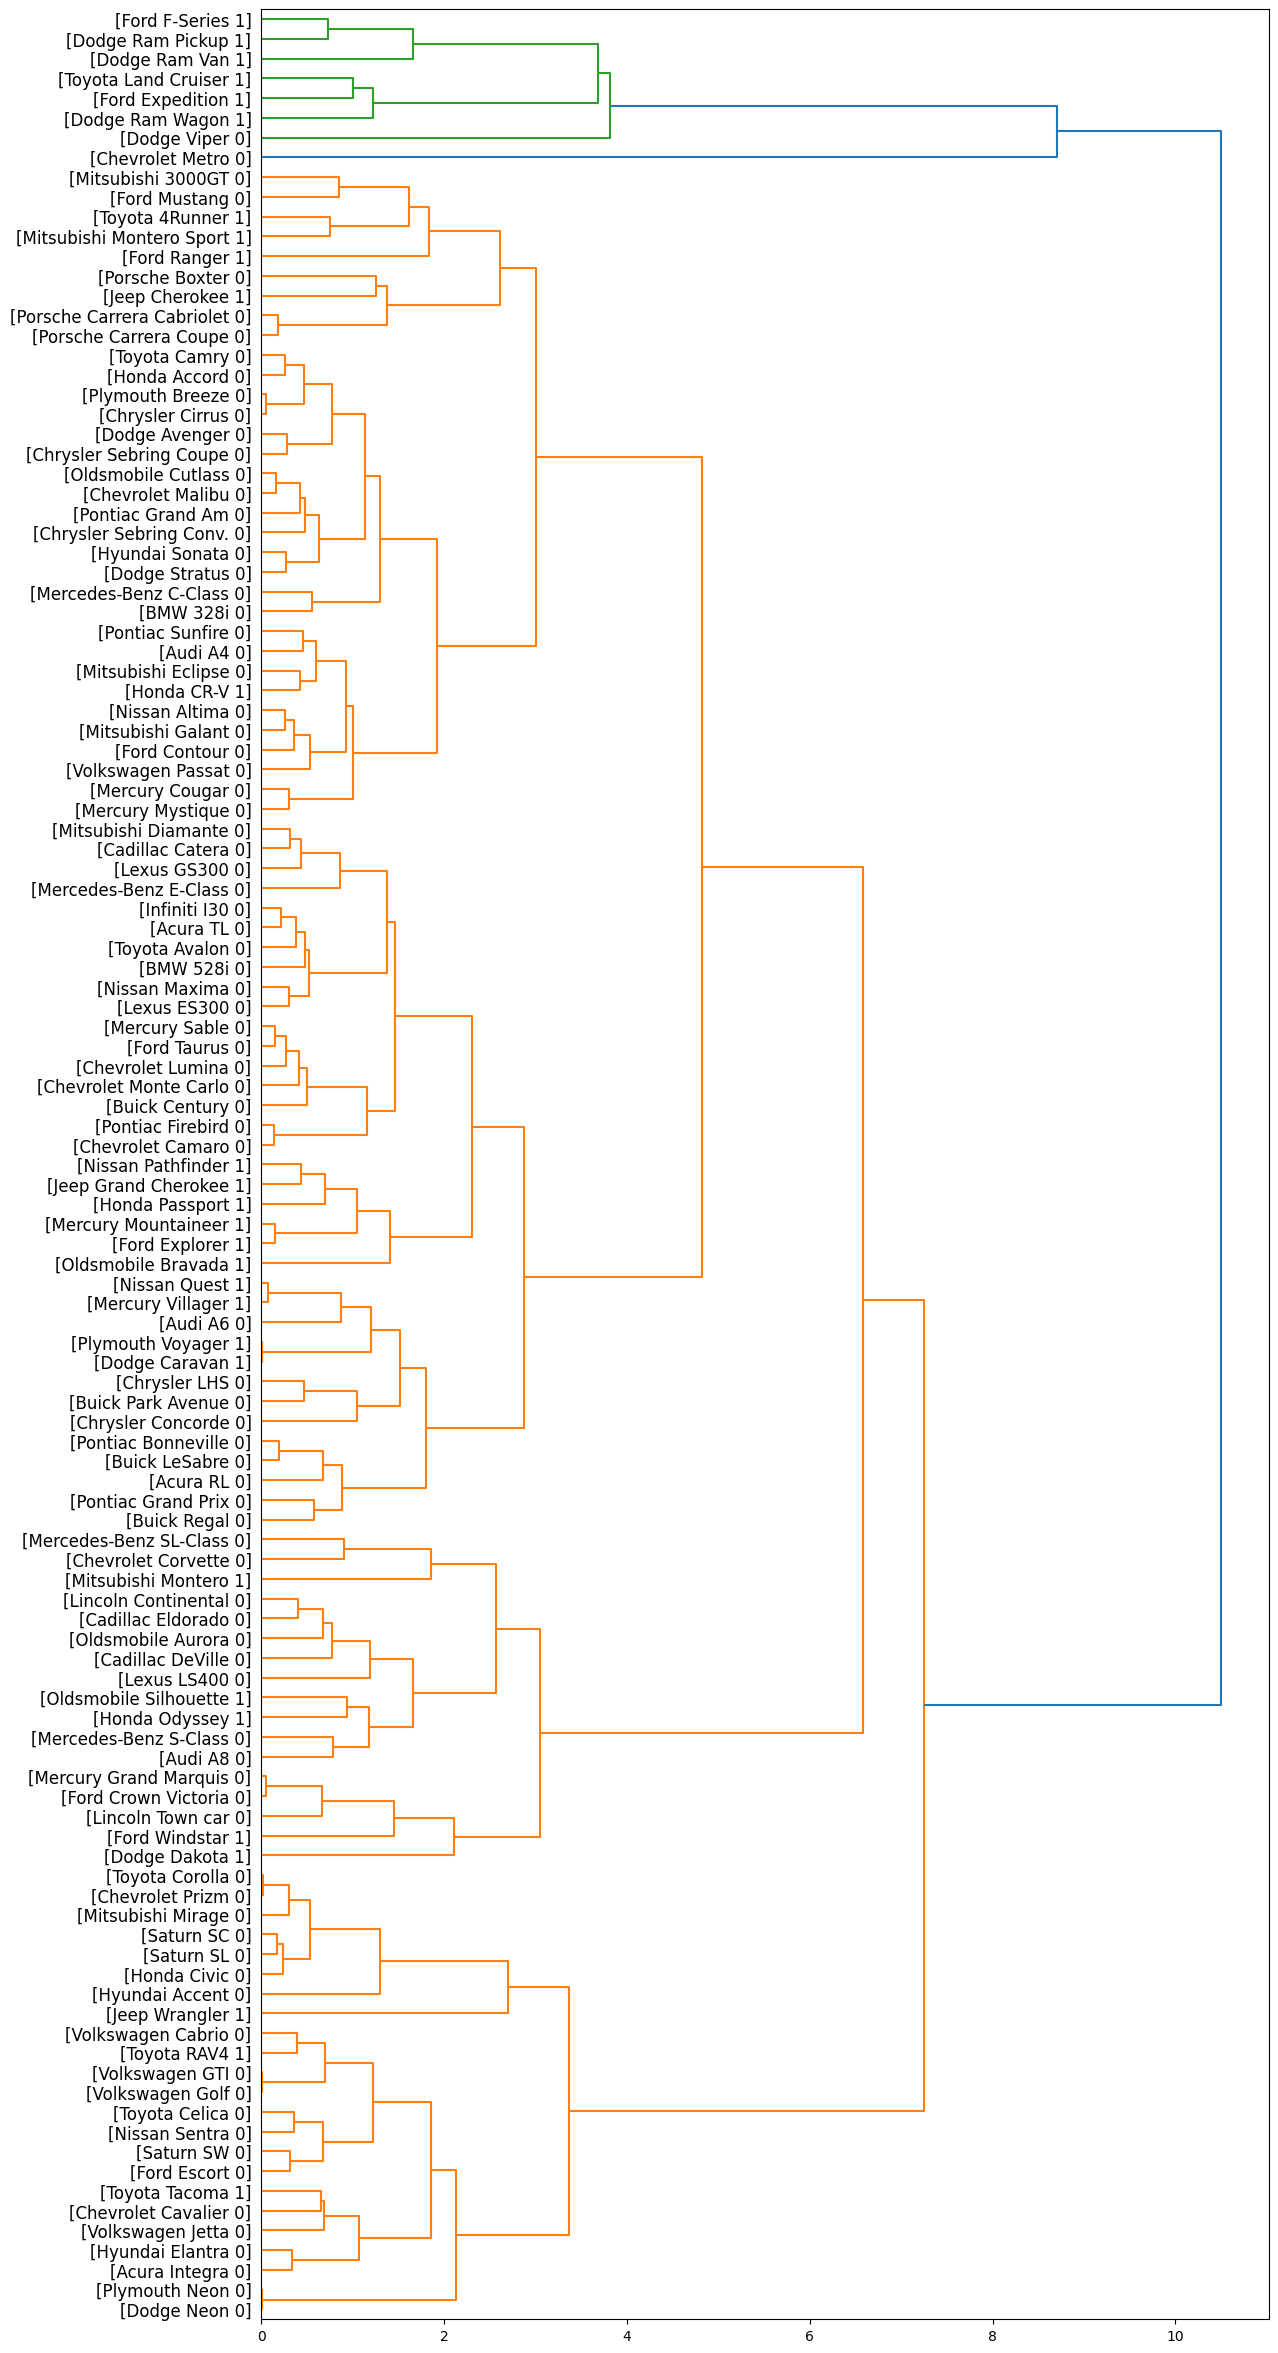

In [131]:
fig = pylab.figure(figsize=(13,30))
def llf(id):
    return '[%s %s %s]' % (Data['manufact'][id], Data['model'][id], int(float(Data['type'][id])))
    
dendro = hierarchy.dendrogram(hie,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [132]:
# Create a "AgglomerativeClustering" object and get resultes.
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(hie)

agglom.labels_

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 4, 2, 0, 0, 0, 4,
       4, 4, 2, 2, 4, 4, 2, 1, 1, 4, 0, 4, 4, 0, 2, 1, 4, 0, 2, 2, 1, 0,
       4, 2, 4, 2, 2, 4, 4, 0, 4, 4, 4, 4, 1, 4, 0, 4, 2, 0, 4, 4, 4, 1,
       0, 5, 5, 4, 0, 5, 5, 0, 5, 1, 5, 0, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       0, 3, 3, 3, 0, 3], dtype=int64)